# Etude des variables pour la prédiction de la consommation d'énergie ("TotalGHGEmissions")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
datas = pd.read_csv("Pélec_04_notebook.csv")
datas.head()

,OSEBuildingID,DataYear,PrimaryPropertyType,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,Outlier,Latitude,Longitude,ZipCode,TotalGHGEmissions,GHGEmissionsIntensity,SiteEUI(kBtu/sf)_diff1516,SiteEUIWN(kBtu/sf)_diff1516,SourceEUI(kBtu/sf)_diff1516,SourceEUIWN(kBtu/sf)_diff1516,SiteEnergyUse(kBtu)_diff1516,SiteEnergyUseWN(kBtu)_diff1516,SteamUse(kBtu)_diff1516,Electricity(kWh)_diff1516,Electricity(kBtu)_diff1516,NaturalGas(therms)_diff1516,NaturalGas(kBtu)_diff1516,TotalGHGEmissions_diff1516,GHGEmissionsIntensity_diff1516
0,1,2015,hotel,7,1927,1.0,12.0,88434,0,88434,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,No,NaN,47.612190,-122.337997,98101.0,249.43,2.64,2.799997,4.000003,9.000000,13.900000,244934.5,475482.0,-19150.00,76207.2500,259867.0,40.52930,4065.0,0.55,0.19
1,2,2015,hotel,7,1996,1.0,11.0,103566,15064,88502,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,No,NaN,47.613106,-122.333358,98101.0,263.51,2.38,0.400003,-1.099998,-15.199994,-15.800006,33698.0,310244.0,0.00,-194137.8125,-662560.0,6960.81641,696097.0,32.35,0.48
2,3,2015,hotel,7,1969,1.0,41.0,961990,0,961990,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,Yes,NaN,47.613349,-122.337699,98101.0,2061.48,1.92,-0.600000,-2.000003,-0.800006,-2.399994,-543632.0,806456.0,1906150.00,-68495.0000,-235771.0,-22161.00000,-2216100.0,27.80,0.27
3,5,2015,hotel,7,1926,1.0,10.0,61320,0,61320,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,No,High Outlier,47.614216,-122.336609,98101.0,1936.34,31.38,-349.599997,-349.199997,-420.100003,-419.200000,-21434736.0,-21282519.5,-21244071.75,4.3125,-99.0,-1906.86914,-190681.0,-1649.91,-26.71
4,8,2015,hotel,7,1980,1.0,18.0,119890,12460,107430,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,No,NaN,47.613754,-122.340924,98121.0,507.70,4.02,-5.299997,-3.400003,-17.400006,-11.499994,-656493.0,-172596.0,0.00,-204392.3750,-697638.0,408.98438,40893.0,-2.69,-1.14


Tri des colonnes et gestion des Nan

In [2]:
import re

for col in datas.columns:
    datas = datas.rename(columns={col: re.sub("[(/)\s]", "", col)})
    

Classement des variables

In [3]:
nom_features = ["PrimaryPropertyType", "CouncilDistrictCode", "Outlier" 
    ]
ord_features = ["YearBuilt", "NumberofFloors", "NumberofBuildings", 
    ]
num_features = ["PropertyGFATotal", "PropertyGFABuildings", "PropertyGFAParking", 
    ]
num_features_a_diss = ["SiteEnergyUsekBtu_diff1516", "SiteEnergyUseWNkBtu_diff1516", "SteamUsekBtu_diff1516", 
    "ElectricitykBtu_diff1516", "NaturalGaskBtu_diff1516",

    "SiteEnergyUseWNkBtu", "SteamUsekBtu", "ElectricitykBtu", "NaturalGaskBtu", "OtherFuelUsekBtu", "SiteEnergyUsekBtu" 
    ]
a_exclure = ["SiteEUIkBtusf", "SiteEUIWNkBtusf", "SourceEUIkBtusf", "SourceEUIWNkBtusf", "GHGEmissionsIntensity", 
    "TotalGHGEmissions_diff1516", "GHGEmissionsIntensity_diff1516", 
    
    "SiteEUIkBtusf_diff1516", "SiteEUIWNkBtusf_diff1516", "SourceEUIkBtusf_diff1516", "SourceEUIWNkBtusf_diff1516", 
    ]
cible = ["TotalGHGEmissions"]

<AxesSubplot:>

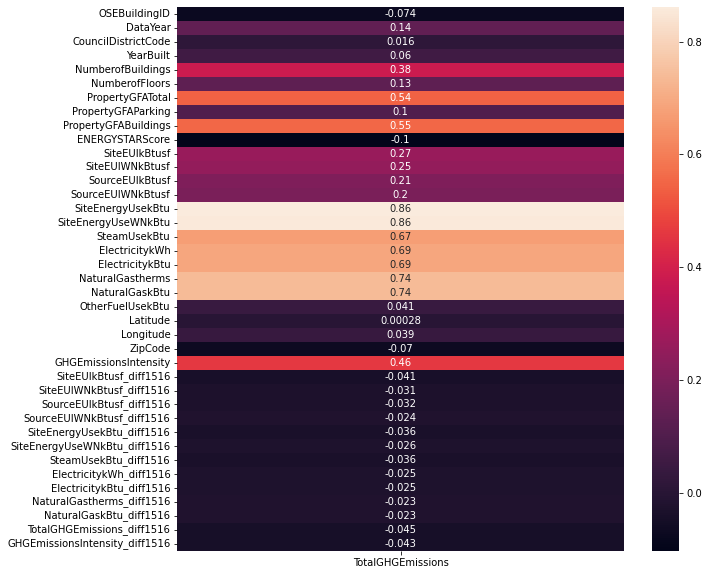

In [4]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(datas.corr().filter(cible).drop(cible), annot=True)

Varaiables non nécessaires pour la régression:
1. ZipCode
2. Longitude
3. Latitude
4. DataYear
5. OSEBuildingID
6. DefaultData


In [5]:
def convert_nan(data, cols=None):
    if type(data) == pd.DataFrame:
        if cols is None:
            cols = data.columns
        for col in cols:
            if data[col].dtypes == np.object_:
                data.loc[(data[col].isnull()) | (data[col] == np.inf) | (data[col] == -np.inf), col] = "nan"
            else:
                if data[col].dtypes == np.int64:
                    data[col] = data[col].astype(np.float64)
                data.loc[(data[col].isnull()) | (data[col] < 0), col] = 0
                data[col].replace([-np.inf], 0, inplace=True)
                maxi = data.loc[data[col] != np.inf, col].max()
                data[col].replace([np.inf], maxi, inplace=True)

    else:
        if data.dtypes == np.object_:
            data.replace(np.nan, "nan", inplace=True)
        else:
            data.replace([np.nan, -np.inf], 0, inplace=True)
            maxi = data[data != np.inf].max()
            data.replace([np.inf], data.max(), inplace=True)

    return data

In [6]:
n_datas = datas.copy()

cat_features = nom_features + ord_features

n_datas = convert_nan(n_datas, cat_features)
n_datas = convert_nan(n_datas, num_features)
n_datas = convert_nan(n_datas, num_features_a_diss)
n_datas = convert_nan(n_datas, a_exclure)
n_datas = convert_nan(n_datas, cible)
n_datas = n_datas.drop(columns=["ZipCode", "Longitude", "Latitude", "DataYear",  "DefaultData"])

## Variables catégorielles

### Uniformisation des valeurs des variables catégorielles

1. "PrimaryPropertyType" déjà effectuée lors de l'étape 1
2. "CouncilDistrictCode", "YearBuilt", "NumberofFloors", "NumberofBuildings" sont des valeurs discrètes
3. "Outlier

### Visualisation de la corrélation avec la variable à prédire

In [7]:
n_datas["Outlier"].unique()

array(['nan', 'High Outlier', 'Low Outlier'], dtype=object)

In [8]:
n_datas["Outlier"] = n_datas["Outlier"].apply(lambda x: x.lower())

<AxesSubplot:>

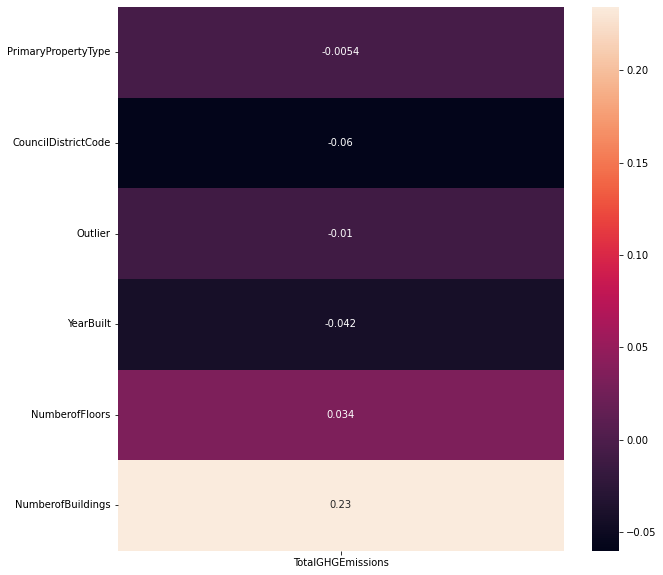

In [9]:
import seaborn as sns

tmp_cat = n_datas[cat_features].copy()

for col in cat_features:
    tmp_cat[col] = pd.factorize(tmp_cat[col])[0]

tmp_cat[cible] = n_datas[cible]

corr_cat = tmp_cat.corr().filter(cible).drop(cible)

fig = plt.figure(figsize=(10,10))
sns.heatmap(corr_cat, annot=True)

## Variables quantitatives

1. Variables laissées tel quel (num_features)
2. Variables à dissocier pour éviter le data leakage (num_features_a_diss)
3. Variables à exclure de la modélisation (a_exclure)

### 1. num_features

Visualisation de la corrélation avec la variables à prédire et étude des la distribution

<AxesSubplot:>

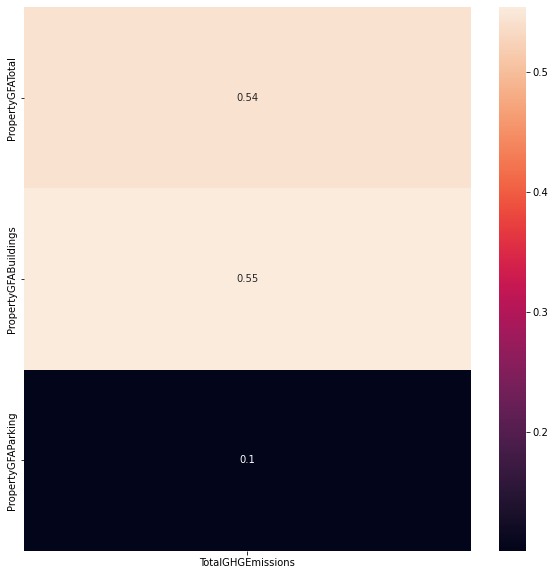

In [10]:
tmp_num = n_datas[num_features].copy()

tmp_num[cible] = n_datas[cible]

corr_num = tmp_num.corr().filter(cible).drop(cible)

fig = plt.figure(figsize=(10,10))
sns.heatmap(corr_num, annot=True)

Je double le nombre de classes pour avoir un histogramme plus précis

In [11]:
def histogr(datas, cols):
    nb_classes = round(1 + np.log2(len(datas))) * 2

    plt_cols_full = len(cols) // 3
    if len(cols) % 3 != 0:
        plt_col_suppl = 1
    else:
        plt_col_suppl = 0
    plt_cols = plt_cols_full + plt_col_suppl

    fig = plt.figure(figsize=(15, 5 * plt_cols))
    for num, col in enumerate(cols):
        ax = fig.add_subplot(plt_cols, 3, num+1)
        skew = round(datas[col].skew(), 3)
        kurt = round(datas[col].kurtosis(), 3)
        ax.hist(datas[col], bins=nb_classes, label= f"Skewness: {skew}\nKurtosis: {kurt}")
        ax.set_title(col, fontsize=14)
        ax.legend()



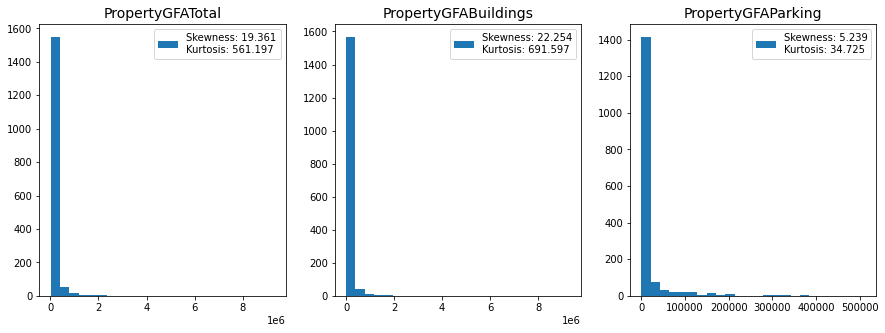

In [12]:
histogr(n_datas, num_features)

On peut voir sur les trois histogrammes que les valeurs sont très concentrées sur la gauche

Il s'agit maintenant de normaliser les distributions pour comparer

In [13]:
def to_log(data):
    tmp = convert_nan(data)
    return np.log(tmp + 1)

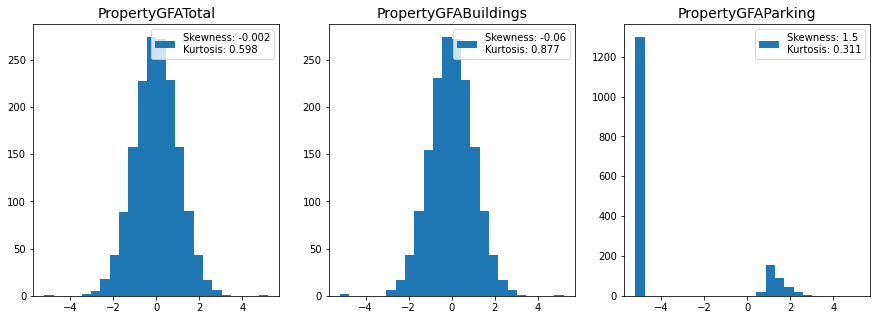

In [14]:
from sklearn.preprocessing import QuantileTransformer

tmp_num = pd.DataFrame(QuantileTransformer(output_distribution= "normal").fit_transform(n_datas[num_features]), 
    columns=num_features)

histogr(tmp_num, tmp_num.columns)


### 1. Conclusion num_features

Pour commencer "PropertyGFATotal" est la somme de "PropertyGFABuildings" et "PropertyGFAParking"

"PropertyGFATotal" et "PropertyGFABuildings" ont quasiment le même coefficient de corrélation avec "TotalGHGEmissions" (0.54 et 0.55). 

J'aurais donc tendance à vouloir garder la variable avec le plus haut coefficient ("PropertyGFABuildings") et supprimer la seconde. D'autant plus qu'en faisant cela, si je garde aussi "PropertyGFAParking", c'est comme "partitionner" la variable "PropertyGFATotal" étant donné qu'elle est la somme de "PropertyGFABuildings" et "PropertyGFAParking"

On peut voir aussi des valeurs semblant être des outliers pour -4 < "PropertyGFABuildings" < 4 que je vais retirer. Idem pour la variable "PropertyGFATotal"

Pour rappel, les limites des outliers sont fixées à 3 écart-types. Cette valeur sera utilisée par la suite

Enfin, ces variables seront à transformer pour la modelisation

In [15]:
n_datas["transf"] = QuantileTransformer(output_distribution= "normal").fit_transform(
    n_datas["PropertyGFABuildings"].to_numpy().reshape(-1, 1))
n_datas = n_datas[(n_datas["transf"] > -3) & (n_datas["transf"] < 3)].reset_index(drop= True)

n_datas["transf"] = QuantileTransformer(output_distribution= "normal").fit_transform(
    n_datas["PropertyGFATotal"].to_numpy().reshape(-1, 1))
n_datas = n_datas[(n_datas["transf"] > -3) & (n_datas["transf"] < 3)].reset_index(drop= True)


### 2. num_features_a_diss

Visualisation de la corrélation avec la variables à prédire et étude des la distribution

<AxesSubplot:>

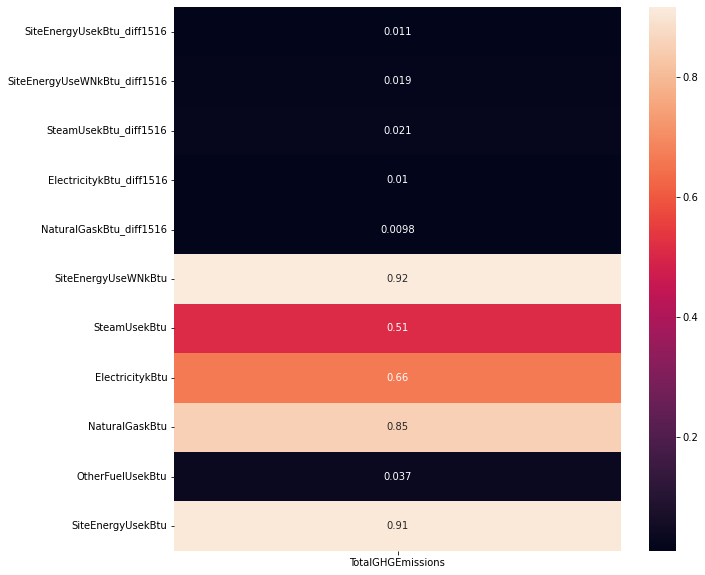

In [16]:
tmp_num_diss = n_datas[num_features_a_diss].copy()

tmp_num_diss[cible] = n_datas[cible]

corr_num_diss = tmp_num_diss.corr().filter(cible).drop(cible)

fig = plt.figure(figsize=(10,10))
sns.heatmap(corr_num_diss, annot=True)

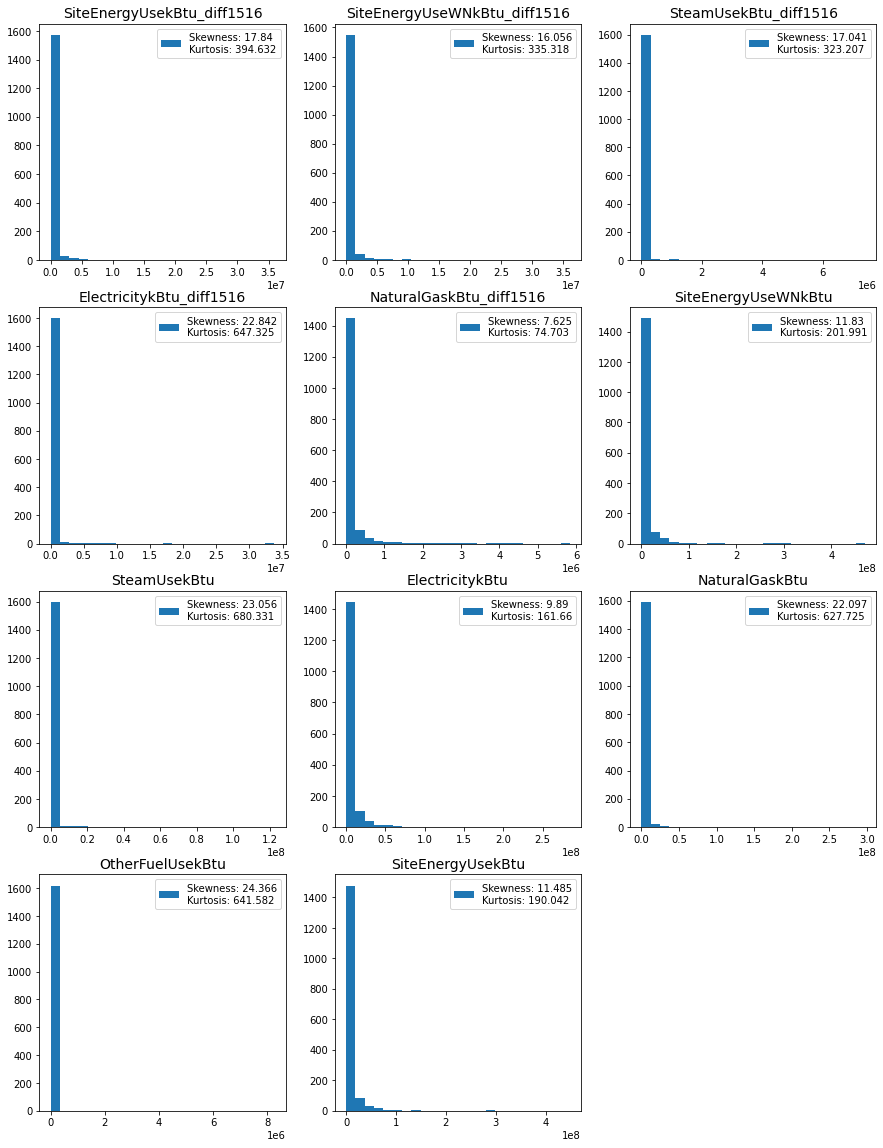

In [17]:
histogr(n_datas, num_features_a_diss)

Absolument toutes les variables sont très concentrées à gauches. Il faut les normaliser d'autant plus qu'elles n'ont pas le même ordre de grandeur

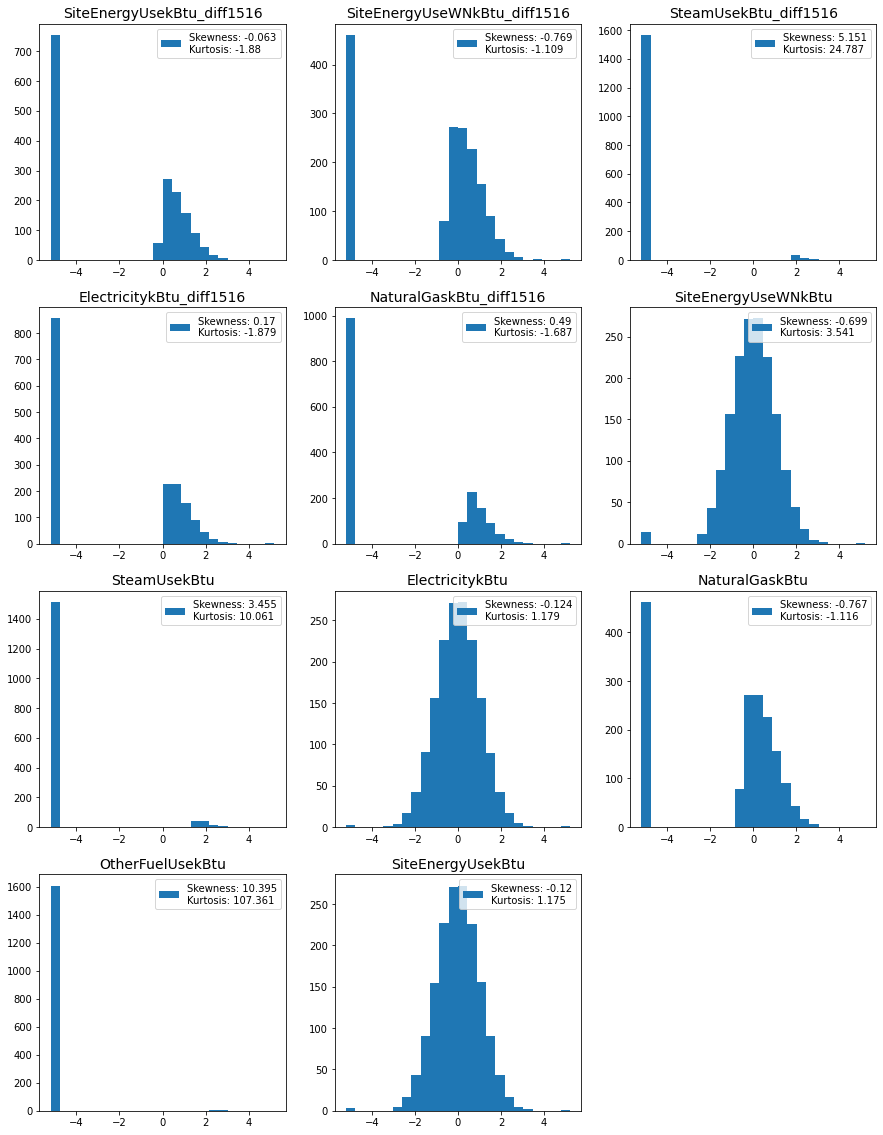

In [18]:
tmp_num_diss = pd.DataFrame(QuantileTransformer(output_distribution= "normal").fit_transform(n_datas[num_features_a_diss]), 
    columns=num_features_a_diss)

histogr(tmp_num_diss, tmp_num_diss.columns)


### 2. Conclusion num_features_a_diss

Après normalisation, il semble y avoir beaucoup de outliers notamment inférieurs à -4 pour les variables représentants les différences de consommation entre les années 2015 et 2016. Ces variables ne seront peut-être pas gardées pour la modélisation

Quant aux variables de consommation d'énergie:
* "OtherFuelUsekBtu" et "SteamUsekBtu" ont beaucoup trop de outliers et une distribution essentiellement concentrée sur ces derniers
* "SiteEnergyUsekBtu", "SiteEnergyUseWNkBtu", "ElectricitykBtu" et "NaturalGaskBtu" ont une distribution relativement bien normalisée avec assez peu de outliers sauf pour "NaturalGaskBtu" qui a de l'ordre de 500 outliers

Je vais donc supprimer les outliers pour les variables en ayant une faibles quantité. Pour les autres, je supprimerai peut-être entièrement la feature en entier

De plus, "SiteEnergyUsekBtu" est la somme de "SteamUsekBtu", "ElectricitykBtu", "NaturalGaskBtu" et "OtherFuelUsekBtu", je vais donc retirer cette feature. On peut donc en déduire qu'il en va de même pour "SiteEnergyUseWNkBtu" qui devrait être la somme des mêmes variables mais normalisées sur le climat des 30 dernières années. Je vais donc créer ces variables 

In [20]:
tmp_cols = [x for x in num_features_a_diss if x in ["SiteEnergyUseWNkBtu", "ElectricitykBtu", "SiteEnergyUsekBtu"]]

for col in tmp_cols:
    n_datas["transf"] = QuantileTransformer(output_distribution= "normal").fit_transform(n_datas[col].to_numpy().reshape(-1,1))
    n_datas = n_datas[(n_datas["transf"] > -3) & (n_datas["transf"] < 3)].reset_index(drop= True)


In [21]:
n_datas = n_datas.drop(columns=["transf"])
n_datas.to_csv("Pélec_12_notebook.csv", index=False)